# SKN 19기 mini-project 5팀(팀명: 여권어디있지) M/L

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# pandas 출력 옵션
pd.set_option('display.float_format', '{:.2f}'.format)


# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [79]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 회귀를 평가하는 함수
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true,y_pred)
    rmse = root_mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

In [80]:
df_listings = pd.read_csv('./data/listings_cleaned_1st.csv')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23007 entries, 0 to 23006
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   neighbourhood_cleansed      23007 non-null  object 
 1   property_type               23007 non-null  object 
 2   room_type                   23007 non-null  object 
 3   accommodates                23007 non-null  int64  
 4   bathrooms                   23007 non-null  float64
 5   bedrooms                    23007 non-null  float64
 6   beds                        23007 non-null  float64
 7   price                       23007 non-null  float64
 8   number_of_reviews           23007 non-null  int64  
 9   first_review                19875 non-null  object 
 10  review_scores_rating        19875 non-null  float64
 11  amnt_self_checkin           23007 non-null  int64  
 12  amnt_instant_book           23007 non-null  int64  
 13  amnt_kitchen                230

In [81]:
df_listings.head(5)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,first_review,...,amnt_ev_charger,amnt_crib,amnt_king_bed,amnt_gym,amnt_breakfast,amnt_fireplace,amnt_smoking_allowed,amnt_waterfront,amnt_smoke_alarm,amnt_carbon_monoxide_alarm
0,Bunkyo Ku,Entire rental unit,Entire home/apt,3,1.00,0.00,2.00,100000.00,0,NaN,...,0,0,0,0,0,1,0,0,1,0
1,Bunkyo Ku,Entire rental unit,Entire home/apt,8,1.00,2.00,5.00,100000.00,0,NaN,...,0,0,0,0,0,1,0,0,1,0
2,Taito Ku,Entire serviced apartment,Entire home/apt,4,2.00,2.00,2.00,14550.00,24,2023-12-04,...,0,0,0,0,0,0,0,0,1,1
3,Kita Ku,Entire home,Entire home/apt,8,1.00,3.00,6.00,22012.00,15,2024-01-10,...,0,0,0,0,0,0,0,0,1,1
4,Sumida Ku,Entire rental unit,Entire home/apt,3,1.00,1.00,1.00,15429.00,17,2023-12-26,...,0,1,0,0,0,1,0,0,1,1


In [82]:
# 6. 데이터 변환 및 피처 엔지니어링

In [ ]:
le_neighbourhood_cleansed = LabelEncoder()
le_property_type = LabelEncoder()
le_room_type = LabelEncoder()

df_listings["neighbourhood_cleansed"] = le_neighbourhood_cleansed.fit_transform(df_listings["neighbourhood_cleansed"])
df_listings["property_type"] = le_property_type.fit_transform(df_listings["property_type"])
df_listings["room_type"] = le_room_type.fit_transform(df_listings["room_type"])

In [ ]:
le_neighbourhood_cleansed.classes_

numpy.ndarray

In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

le_neighbourhood_cleansed = LabelEncoder()
le_property_type = LabelEncoder()
le_room_type = LabelEncoder()

df_listings["neighbourhood_cleansed"] = le_neighbourhood_cleansed.fit_transform(df_listings["neighbourhood_cleansed"])
df_listings["property_type"] = le_property_type.fit_transform(df_listings["property_type"])
df_listings["room_type"] = le_room_type.fit_transform(df_listings["room_type"])


# 인코딩 저장
def save_encoding(encoder_nm, encoder_obj):
    file_path = "./data/" + encoder_nm + ".json"
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(encoder_obj.classes_.tolist(), f, ensure_ascii=False, indent=4)

save_encoding('neighbourhood_cleansed', le_neighbourhood_cleansed)
save_encoding('property_type', le_property_type)
save_encoding('room_type', le_room_type)

# days_since_first_review 추가
if False:
    df_listings['first_review'] = pd.to_datetime(df_listings['first_review'], errors='coerce')
    reference_date = pd.to_datetime('2025-06-27')
    df_listings['days_since_first_review'] = (reference_date - df_listings['first_review']).dt.days


# 드롭 목록
drop_list = [
    'number_of_reviews',    # 리뷰 갯수
    'first_review'          # 첫 리뷰 일자
    # 'review_scores_rating'
]

df_listings = df_listings.drop(drop_list, axis=1)


# df_listings.head(5)


In [84]:
le_property_type.classes_



array(['Earthen home', 'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condo', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Hut',
       'Private room', 'Private room in bed and breakfast',
       'Private room in bungalow', 'Private room in cabin',
       'Private room in condo', 'Private room in guest suite',
       'Private room in guesthouse', 'Private room in home',
       'Private room in hostel', 'Private room in hut',
       'Private room in kezhan', 'Private room in minsu',
       'Private room in nature lodge', 'Private room in rental unit',
       'Private room in resort', 'Private room in ryokan',
       'Private room in serviced apartment', 'Private room in tent',
       'Private room in tiny home', 'Private room in tower',
       'Private room in townhouse', 'Pr

In [85]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import optuna

def print_optimized_hyper_params(X, y):

    def lgbm_optuna_objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }

        lgbm_reg = LGBMRegressor(**params, n_jobs=-1)
        mean_r2 = cross_val_score(lgbm_reg, X, y, scoring='r2', cv=3).mean()
        return mean_r2
    # 2. study 객체 -> 최적화
    study = optuna.create_study(direction="maximize")
    study.optimize(lgbm_optuna_objective, n_trials=100)
    # 3. 결과 출력
    print(study.best_value)
    print(study.best_params)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler


x = df_listings.drop('price', axis=1)
y = df_listings['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)




In [87]:
# 스케일링
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train = np.log(y_train)
y_test = np.log(y_test)

In [88]:



lgbm_reg = LGBMRegressor(n_estimators=500,  # 트리의 개수
                         max_depth=9,
                         learning_rate=0.11, # 학습률
                        #  random_state=42,
                         colsample_bytree=0.68,
                         force_row_wise=True, 
                         n_jobs=-1) # 모든 코어 사용

scores = cross_val_score(lgbm_reg, X_train_scaled, y_train, cv=5, scoring='r2')

print("훈련별 정확도:", scores)
print("모델 정확도:", np.mean(scores))




[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 14724, number of used features: 33
[LightGBM] [Info] Start training from score 9.590348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [89]:
lgbm_reg.fit(X_train_scaled, y_train)
y_pred_test = lgbm_reg.predict(X_test_scaled)
y_pred_train = lgbm_reg.predict(X_train_scaled)

[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 18405, number of used features: 33
[LightGBM] [Info] Start training from score 9.587842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [90]:
evaluate_regression(y_train,y_pred_train)
evaluate_regression(y_test,y_pred_test)

MSE: 0.06266709911729926, RMSE: 0.25033397515578915, MAE: 0.18604746723337975, R2: 0.8307257189234137
MSE: 0.10769850684128053, RMSE: 0.3281745066900848, MAE: 0.24109121621289087, R2: 0.7137196295327228


In [91]:
import json
amenities = './data/amenities.json'
columns = './data/columns.json'


# 📂 불러오기 (Reading)
with open(amenities, 'r', encoding='utf-8') as f:
    amenity_eng_to_kor = json.load(f)

with open(columns, 'r', encoding='utf-8') as f:
    columns_ori = json.load(f)

# 한글-영어 매핑 딕셔너리 (반대 변환용)
# amenity_kor_to_eng = {v: k for k, v in amenity_eng_to_kor.items()}



In [92]:

columns_kor = [amenity_eng_to_kor.get(col.replace('amnt_',''), col) for col in X_train.columns]
columns_kor = [columns_ori.get(col.replace('amnt_',''), col) for col in columns_kor]


columns_kor
# columns_kor = 

['정제된 숙소 지역 이름',
 '숙소의 종류',
 '숙소의 방 유형',
 '숙소가 수용 가능한 최대 인원 수',
 '숙소의 욕실 개수',
 '숙소의 침실 개수',
 '숙소의 침대 개수',
 '총 리뷰 점수(별점)의 평균값',
 '셀프 체크인',
 '즉시예약',
 '주방',
 '헤어드라이어',
 '무료 주차 공간',
 '와이파이',
 '침실에 딸린 개인 욕실',
 '바베큐 그릴',
 '세탁기',
 '반려동물 동반 가능',
 '건조기',
 '난방',
 '냉방',
 '업무 전용 공간',
 '다리미',
 '수영장',
 '대형 욕조',
 '전기차 충전시설',
 '아기 침대',
 '킹사이즈 침대',
 '헬스장',
 '조식',
 '실내 벽난로',
 '흡연 가능',
 '수변',
 '화재경보기',
 '일산화탄소 경보기',
 'days_since_first_review']

In [93]:
amenity_eng_to_kor.keys()

dict_keys(['self_checkin', 'instant_book', 'kitchen', 'hair_dryer', 'free_parking', 'wifi', 'private_bathroom', 'bbq_grill', 'washer', 'pets_allowed', 'clothes_dryer', 'heating', 'air_conditioning', 'workspace', 'iron', 'pool', 'bathtub', 'ev_charger', 'crib', 'king_bed', 'gym', 'breakfast', 'fireplace', 'smoking_allowed', 'waterfront', 'smoke_alarm', 'carbon_monoxide_alarm', 'other'])

In [94]:
X_train.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'amnt_self_checkin', 'amnt_instant_book', 'amnt_kitchen',
       'amnt_hair_dryer', 'amnt_free_parking', 'amnt_wifi',
       'amnt_private_bathroom', 'amnt_bbq_grill', 'amnt_washer',
       'amnt_pets_allowed', 'amnt_clothes_dryer', 'amnt_heating',
       'amnt_air_conditioning', 'amnt_workspace', 'amnt_iron', 'amnt_pool',
       'amnt_bathtub', 'amnt_ev_charger', 'amnt_crib', 'amnt_king_bed',
       'amnt_gym', 'amnt_breakfast', 'amnt_fireplace', 'amnt_smoking_allowed',
       'amnt_waterfront', 'amnt_smoke_alarm', 'amnt_carbon_monoxide_alarm',
       'days_since_first_review'],
      dtype='object')

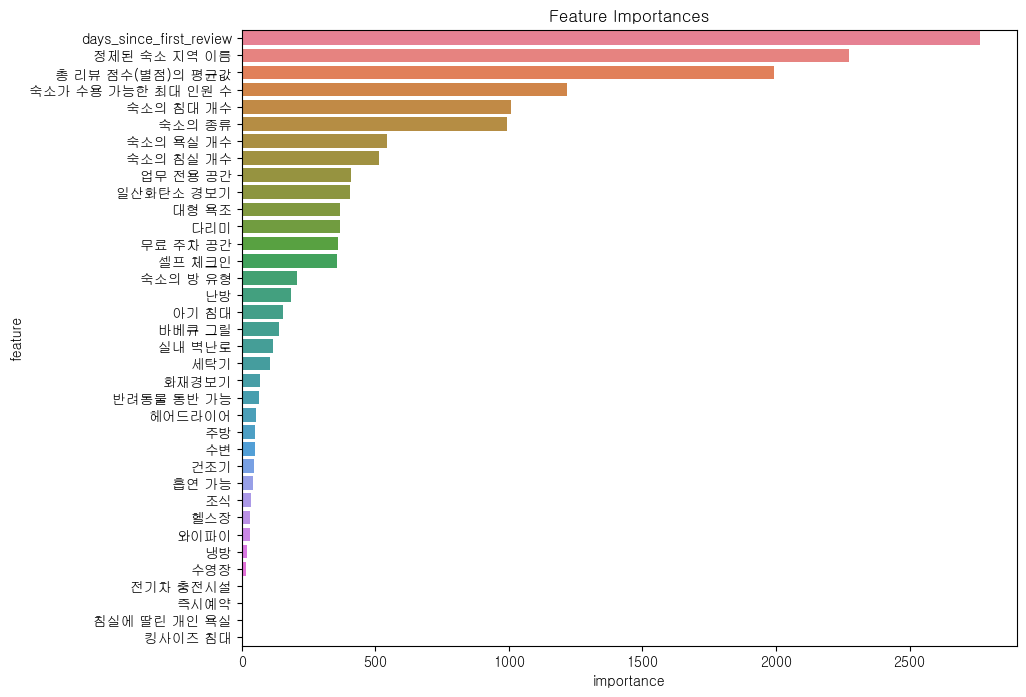

In [95]:
# DataFrame으로 생성
importances = pd.DataFrame({
    # 'feature': X_train.columns,
    'feature': columns_kor,
    'importance': lgbm_reg.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# DataFrame 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=importances, x='importance', y='feature', hue='feature')
plt.title('Feature Importances')
plt.show()